In [1]:
%pip install geopandas
%pip install geopy

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 419.4 kB/s eta 0:00:38
   - -------------------------------------- 0.5/16.2 MB 419.4 kB/s eta 0:00:38
   - -------------------------------------- 0.5/16.2 MB 419.4 kB/s eta 0:00:38
   - -------------------------------------- 0.5/16.2 MB 419.4 kB/s eta 0:00:38
   - -------------------------------------- 0.8/16.2 MB 346.1 kB/s eta 0:00:45
   - -------------------------------------- 0


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import geopandas as gpd
import string

## Merging Polygons

In [15]:
gquar = gpd.read_file('Raw Datasets/Quartieri_Bari/Quartieri.shp')

In [16]:
gquar = (
    gquar
        .groupby(by='nome')
        .apply(func=lambda x: x.dissolve())['geometry'] # used to work on sub DF
        .reset_index()
        .drop(columns='level_1')
)

C:\Users\giaco\AppData\Local\Temp\ipykernel_13488\3769092713.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(func=lambda x: x.dissolve())['geometry'] # used to work on sub DF


In [17]:
gquar.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

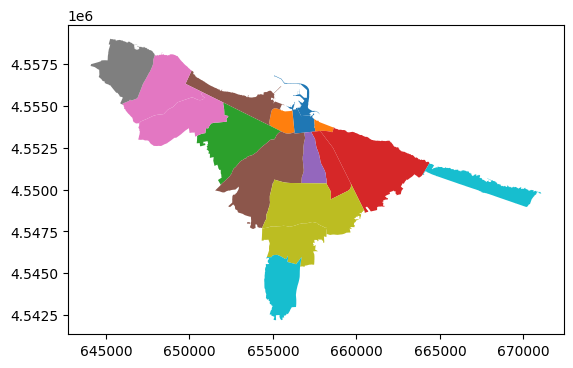

In [18]:
gquar.plot(column='nome');

In [19]:
gquar.to_csv('Raw Datasets\quartieri.csv', sep='\t')

<>:1: SyntaxWarning: invalid escape sequence '\q'
<>:1: SyntaxWarning: invalid escape sequence '\q'
C:\Users\giaco\AppData\Local\Temp\ipykernel_13488\2933493031.py:1: SyntaxWarning: invalid escape sequence '\q'
  gquar.to_csv('Raw Datasets\quartieri.csv', sep='\t')


## Read data

In [20]:
df_crim = pd.read_csv('Raw Datasets\elenco-beni-confiscati-alla-criminalita-organizzata.csv', sep=';')
df_quar = pd.read_csv('Raw Datasets\quartieri.csv', sep='\t')

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\q'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\q'
C:\Users\giaco\AppData\Local\Temp\ipykernel_13488\3654460310.py:1: SyntaxWarning: invalid escape sequence '\e'
  df_crim = pd.read_csv('Raw Datasets\elenco-beni-confiscati-alla-criminalita-organizzata.csv', sep=';')
C:\Users\giaco\AppData\Local\Temp\ipykernel_13488\3654460310.py:2: SyntaxWarning: invalid escape sequence '\q'
  df_quar = pd.read_csv('Raw Datasets\quartieri.csv', sep='\t')


## Adding geometry

Normalize names to match the ones in df_crim.

In [21]:
df_quar['nome'] = (
    df_quar
        .loc[:, 'nome']
        .str.lower()
        .map(lambda x: x.split('- ')[1]) # normalize name removing numbers
        .map(lambda x: 'carbonara' if x == 'carbonara di bari' else x) # fix names
        .map(lambda x: 'marconi' if x == 'marconi ' else x)
)

In [22]:
df_crim['Quartiere'] = df_crim['Quartiere'].str.lower()

Map the data to add geometry. First create a dictionary.

In [23]:
mapping = pd.Series(index=df_quar['nome'], data=df_quar['geometry'].to_list()).to_dict()
mapping

{'san nicola': 'MULTIPOLYGON (((656605.0134 4556285.5462, 656606.8102 4556285.1087, 656607.2634 4556286.6712, 656607.0446 4556288.2493, 656606.5915 4556289.8275, 656606.8102 4556292.0931, 656607.0446 4556293.89, 656607.7165 4556295.4681, 656607.9352 4556297.0462, 656607.2634 4556299.0618, 656606.8102 4556301.0931, 656606.5915 4556303.3431, 656607.0446 4556305.1556, 656607.7165 4556306.4993, 656607.7165 4556308.0775, 656607.7165 4556310.3275, 656607.9352 4556312.3587, 656606.5915 4556313.4837, 656604.7946 4556313.0306, 656602.529 4556312.5931, 656600.5134 4556311.9056, 656598.4821 4556311.9056, 656596.2321 4556311.9056, 656594.654 4556311.6868, 656593.0759 4556311.2337, 656591.4977 4556312.3587, 656590.3727 4556313.4837, 656589.4665 4556314.6087, 656588.3415 4556316.1868, 656587.2165 4556317.9993, 656585.8727 4556319.7962, 656584.5134 4556321.5931, 656583.6071 4556323.6243, 656582.7165 4556324.7493, 656580.6852 4556325.6556, 656579.1071 4556326.1087, 656577.529 4556326.1087, 656575.9509

Now the mapping is applied on the main dataframe.

In [24]:
df_crim['geometry'] = df_crim['Quartiere'].map(lambda x: mapping[x])

In [25]:
df_crim.to_csv('elenco-beni-confiscati-alla-criminalita-organizzata.csv', sep='\t')